In [1]:
# import libraries"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path=r'C:\Users\t3mar\Career Foundry\Data Analytics\Project 6 Citibike'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared', 'Rides & Operations.pkl'))

In [5]:
df.shape

(979515, 36)

In [12]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'start_location', 'end_lat',
       'end_lng', 'end_location', 'member_casual', 'Month-Year', 'rebalances',
       'stations_active_eom', 'technician_visits', 'reported_station_malfx',
       'reported_dock_malfx', 'station_uptime', 'repairs',
       'unique_bikes_checked', 'vanadlism', 'crashes', 'net_loss_bikes',
       'customer_service_calls', 'abandon_call_rate',
       'overflow_calls_processed', 'calls_per_100_rides', 'avg_call_time',
       'avg_hold_time', 'emails', 'refunds_and_discounts', '_merge'],
      dtype='object')

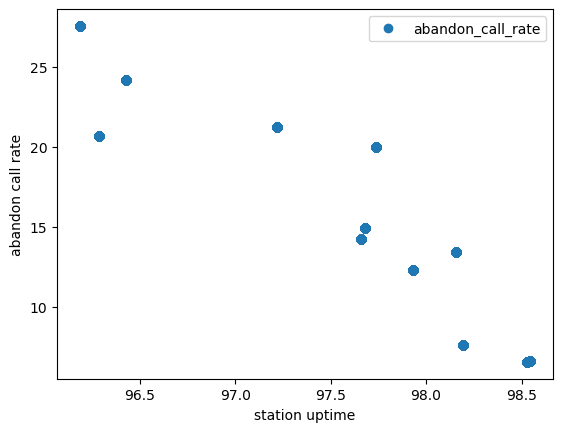

In [14]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'station_uptime', y='abandon_call_rate',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('')  
plt.xlabel('station uptime')  
plt.ylabel('abandon call rate')  
plt.show()

### 5. As station uptime increases, abandon call rate decreases

In [15]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['station_uptime'].values.reshape(-1,1)
y = df['abandon_call_rate'].values.reshape(-1,1)

In [16]:
X

array([[96.285],
       [96.285],
       [96.285],
       ...,
       [98.547],
       [98.547],
       [98.547]])

In [17]:
y

array([[20.65],
       [20.65],
       [20.65],
       ...,
       [ 6.61],
       [ 6.61],
       [ 6.61]])

In [18]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [20]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

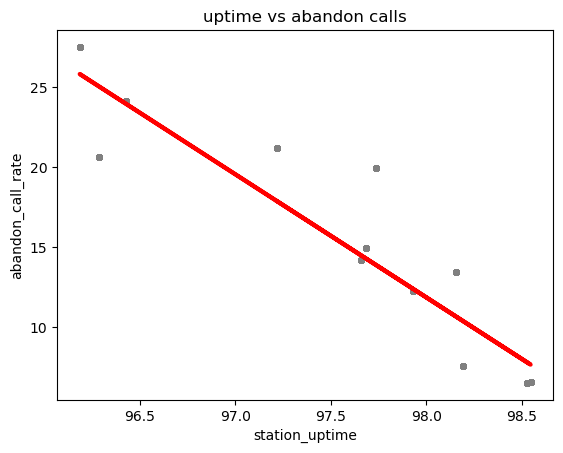

In [22]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('uptime vs abandon calls')
plot_test.xlabel('station_uptime')
plot_test.ylabel('abandon_call_rate')
plot_test.show()

### 10. The line seems to fit very well.

In [23]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [24]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-7.6866128]]
Mean squared error:  6.889869875648487
R2 score:  0.8674706318768438


In [25]:
y_predicted

array([[ 7.80615791],
       [25.83895153],
       [ 7.80615791],
       ...,
       [25.06260364],
       [ 7.67548549],
       [17.8810013 ]])

In [26]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,6.54,7.806158
1,27.54,25.838952
2,6.54,7.806158
3,27.54,25.838952
4,6.54,7.806158
5,19.95,13.893955
6,27.54,25.838952
7,7.61,10.393472
8,14.94,14.322100
9,14.94,14.322100


In [27]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [28]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [29]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-7.6866128]]
Mean squared error:  6.853494708627524
R2 score:  0.8682456750658007


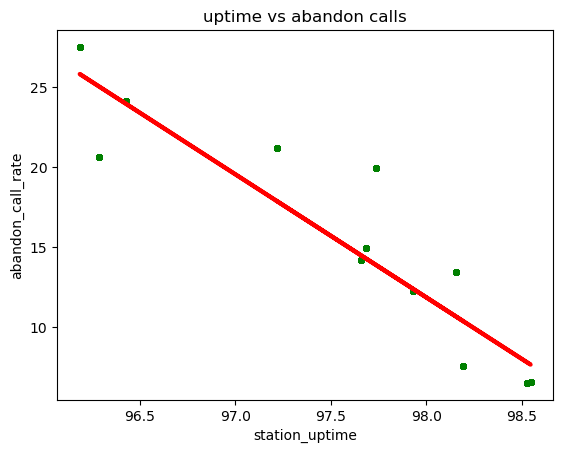

In [30]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('uptime vs abandon calls')
plot_test.xlabel('station_uptime')
plot_test.ylabel('abandon_call_rate')
plot_test.show()

### 13. Based on the data I have, there don't seem to be many choices to run a regression on. If I knew this was a focus of the exercise I would have focused on a different topic. I choose this regression because I knew it would work while many others would be impossible. CitiBike is going through major corporate changes this year, so a linear regression doesn't fit the business right now. The company has changed business models and also been put up for sale.